In [10]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [11]:
x,y=make_blobs(n_samples=1000, centers=3, n_features=2,random_state=42)

In [12]:
x

array([[-6.59633932, -7.13901457],
       [-6.13753182, -6.58081701],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.44179522, -7.08933147]])

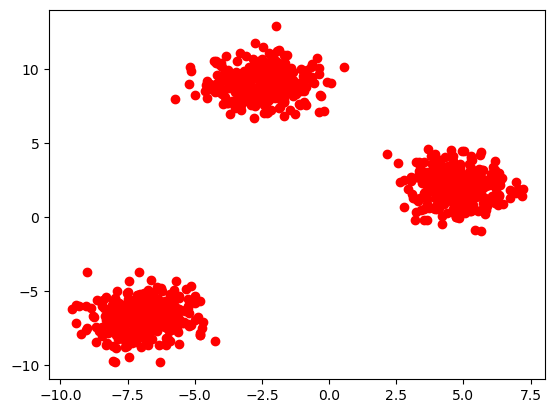

In [17]:
plt.scatter(x[:,0],x[:,1],c='r')

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.cluster import KMeans

In [24]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

In [25]:
wcss

[52946.11684919719,
 15369.674523316213,
 1599.7085950090786,
 1404.0600583089538,
 1220.1520679519642,
 1045.5304378233832,
 925.7394807174784,
 820.4484454464534,
 717.5396182597063,
 656.257229409114]

TypeError: 'AxesSubplot' object is not subscriptable

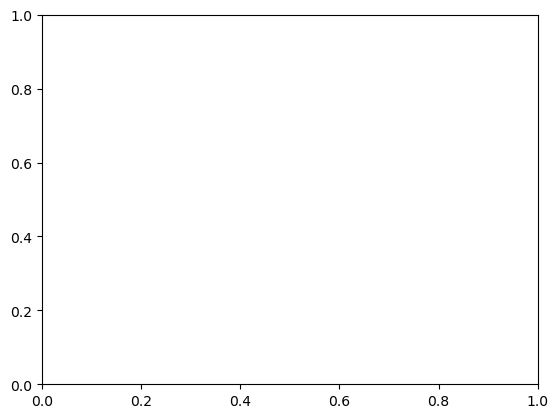

In [55]:
fig,axs=plt.subplots(1,1)
axs[0,0].plot(range(1,11),wcss)
plt.xticks(range(1,11))
axs[0,1].plot(range(1,11),wcss)



Text(0.5, 1.0, 'wcss vs Number of Clusters')

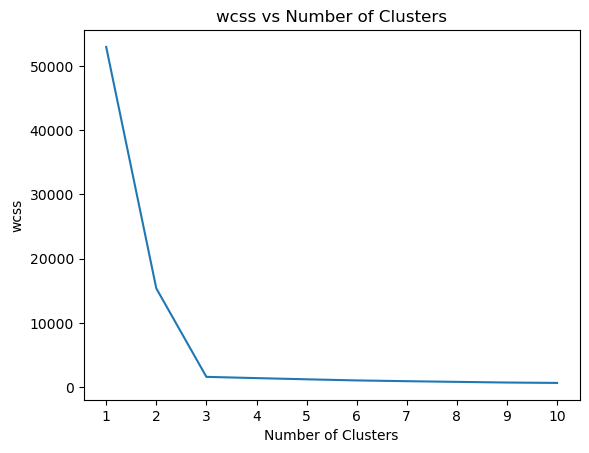

In [38]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.title('wcss vs Number of Clusters')

In [ ]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [39]:
y_labels=kmeans.fit_predict(x_train)

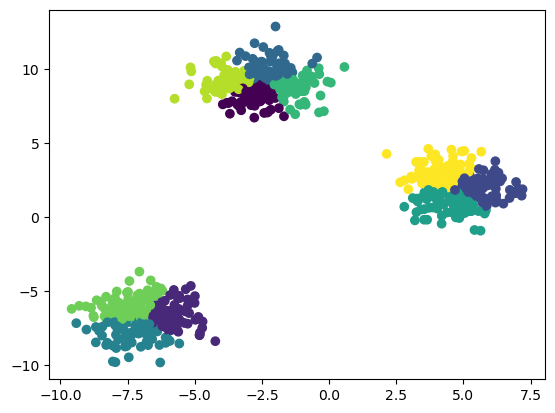

In [42]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_labels)

In [43]:
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable


In [44]:
from kneed import KneeLocator
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

3

In [45]:
from sklearn.metrics import silhouette_score

In [47]:
silhouette_coeff=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train)
    score=silhouette_score(x_train,kmeans.labels_)
    silhouette_coeff.append(score)

In [50]:
silhouette_coeff

[0.7006603070144354,
 0.8413954746484233,
 0.6618264854172378,
 0.5035406246671152,
 0.31633211577684595,
 0.3257180925801324,
 0.3279574558365701,
 0.32920497632514595,
 0.3355733663829389]

([<matplotlib.axis.XTick at 0x23a1ded9910>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

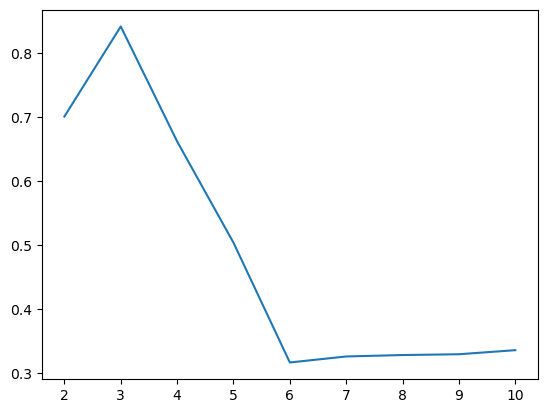

In [54]:
plt.plot(range(2,11),silhouette_coeff)
plt.xticks(range(2,11))